In [5]:
import numpy as np
import matplotlib 
import matplotlib as mpl

import os

from astropy.timeseries import LombScargle
from astropy.table import Table

# configure notebook for plotting
%pylab inline --no-import-all 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color'] # allows access to colours
# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


 name     x      y     flux1    flux2    flux3    par    rv 
------ ------- ------ -------- -------- -------- ----- -----
P00245 -44.794 31.976 2.07e-15 1.56e-15 1.01e-15 0.005 -0.24
P02918 -44.597 30.149  5.8e-15 3.85e-15 2.32e-15 0.003 -0.39
P04858 -44.346  32.34 1.55e-16 7.69e-17  3.4e-17 0.006 -0.28
P00764 -44.103 32.148 3.76e-13 1.79e-13 8.24e-14 0.005 -0.39
P04135 -43.133 30.541 7.69e-15 5.06e-15 2.81e-15 0.005 -0.44
P02767 -42.715 30.316 1.02e-14 6.63e-15 3.63e-15 0.006 -0.42
P01221  -40.19  31.34 5.94e-16 5.49e-16 3.85e-16 0.006 -0.47
P01171 -36.932 30.073 4.13e-14 2.42e-14 1.24e-14 0.005  -0.6
P03809 -36.422 33.345 4.82e-14 2.85e-14 1.42e-14 0.006 -0.41
P01238 -33.614  34.36 2.15e-15 1.74e-15 1.14e-15 0.006 -0.44
P04933  -33.26 31.564 2.93e-14 1.78e-14 9.23e-15 0.006 -0.59

Parallaxes: mean 0.0054, sd 0.0009
Standard Error: 0.0003
Uncertainty in mean: 0.0009

CALCULATED VAUES
Distance Calculated: 186.4, uncertainty 32.1
2*log10(dist)= 4.5, uncertainty 0.1



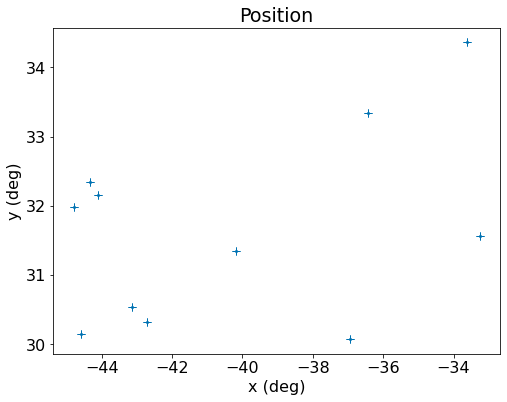

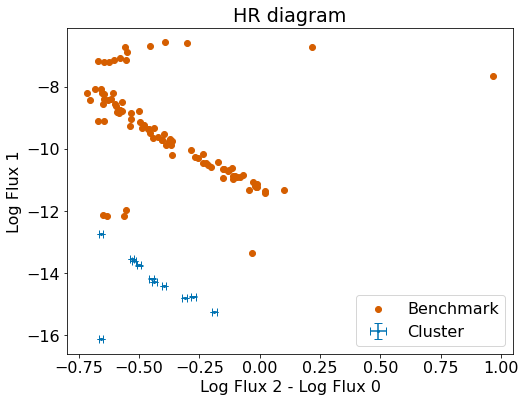

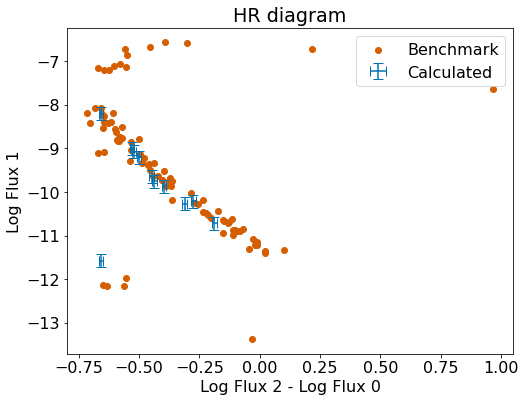

In [377]:
ddir = 'C:/Users/saman/OneDrive/Desktop/U07/Back/A01/'

stars = Table.read(ddir+'points.txt',format='ascii')
print(stars)
print()

#Uncertainty in position
#UX,UY=0.07 arc sec
Ux=0.07/3600 #in deg
Uy=0.07/3600 #in deg

plt.errorbar(stars['x'],stars['y'],xerr=Ux, yerr=Uy,fmt ='o',markersize=2,capsize=4)
plt.xlabel('x (deg)')
plt.ylabel('y (deg)')
plt.title('Position')

m0, m1, m2 = (np.log10(stars['flux1']), 
              np.log10(stars['flux2']), 
              np.log10(stars['flux3'])) 
colour = m2-m0

#Uncertainty in Flux
UFlux1=stars['flux1']*0.015
UFlux2=stars['flux2']*0.015
UFlux3=stars['flux3']*0.015

#Uncertainty in m0, m1, m2
Um0=(1/np.log(10))*(UFlux1/stars['flux1'])
Um1=(1/np.log(10))*(UFlux2/stars['flux2'])
Um2=(1/np.log(10))*(UFlux3/stars['flux3'])

#Uncertainty in colour
UColour=np.sqrt((Um2**2)+(Um0**2))

#Calculate Parallax mean and sd
mean=np.mean(stars['par'])
sd=np.std(stars['par'])

#Calculate number of stars
n=np.size(stars['par'])

#standard error sd/sqrt(n)
SE=sd/np.sqrt(n)

#uncertainty in mean
#UParallax=0.001 arcsec
Umean=np.sqrt(sum((stars['par']-mean)**2)/(n-1))

print('Parallaxes: mean %.4f, sd %.4f' % (mean,sd))
print('Standard Error: %.4f' % SE)
print('Uncertainty in mean: %.4f' % Umean)
print()

import glob # this package lets you search for filenames
import os

all_points = glob.glob('C:/Users/saman/OneDrive/Desktop/U07/*/*/points.txt')

fig = plt.figure()
for j, point in enumerate(all_points):
    try:
        this = Table.read(point,format='ascii')

        thispar = this['par']
        thism0, thism1, thism2 = (np.log10(this['flux1']), 
                                  np.log10(this['flux2']), 
                                  np.log10(this['flux3']))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist)
        mm = thispar>0.03
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color=colours[2])
    except:
        pass

s = plt.errorbar(colour,m1,xerr=UColour,yerr=Um1,fmt ='o',markersize=2,capsize=4)

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')
plt.title('HR diagram')

plt.legend([h,s],['Benchmark','Cluster'])

fig = plt.figure()
for j, point in enumerate(all_points):
    try:
        this = Table.read(point,format='ascii')

        thispar = this['par']
        thism0, thism1, thism2 = (np.log10(this['flux1']), 
                                  np.log10(this['flux2']), 
                                  np.log10(this['flux3']) )
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist)
        mm = thispar>0.03
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color=colours[2])
    except:
        pass

#Guess of distance to cluster.
#L=4.7 #Change value here to match up Cluster and benchmark.
#D=10**(L/2)
#Calculate uncertainties
#UD=D*np.log(10)*0.05

#print('GUESSED VALUES')
#print('2*log10(dist)=', L)
#print('Distance Guess: %.1f, uncertainty %.1f' %(D,UD))
#print()

#Plot Guessed values
#g = plt.scatter(colour,m1+L,color=colours[2]) 

#Use parallax mean to calculate distance to cluster
Dist=1/mean
LOG=2*np.log10(Dist)
#Calculate uncertainties
UDist=Dist*(Umean/mean)
ULOG=2*(1/np.log(10))*(UDist/Dist)

print('CALCULATED VAUES')
print('Distance Calculated: %.1f, uncertainty %.1f' % (Dist,UDist))
print('2*log10(dist)= %.1f, uncertainty %.1f' % (LOG,ULOG))
print()

#Plot calculated values with errorbars. 
c=plt.errorbar(colour,m1+LOG,xerr=UColour,yerr = ULOG,fmt ='None',markersize=8, capsize=5)

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')
plt.title('HR diagram')

plt.legend([h,c],['Benchmark','Calculated']);